In [1]:
#导入包
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.markers
import networkx as nx

In [2]:
#周期序列
Q=np.array([0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18])

In [3]:
#getHVGPoint函数：输入序列Q，返回VG图中需要连接的两点坐标的集合
def getHVGPoint(Q):
    #坐标
    x=np.array(range(1,len(Q)+1))
    y=np.array(Q)

    #准备序列a,b，将相连的两点的x坐标分别记录在a,b序列中
    a=[]
    b=[]

    #遍历,获得连接两点的横坐标
    #控制ta移动
    for ta in range(0,len(x)-1):
        #控制tb移动
        for tb in range(ta+1,len(x)):
            ta=ta
            ya=y[ta]
            tb=tb
            yb=y[tb]
            #tc在ta,tb之间
            tc=np.array(range(ta+1,tb))
            yc=y[(ta+1):tb]
            #如果相邻，或者值1大于值2，则记录下来
            #并打印相连的两点的坐标用(ta,tb)表示
            if tb-ta==1 or min(np.array([ya,yb]))>max(yc) :
                a.append(ta)
                b.append(tb)
    arr=[a,b]
    return arr


#优化效率
def getHVGPoint2(Q):
    x = np.array(range(1, len(Q) + 1))
    y = np.array(Q)
    #结果集
    arr,arr_ti,arr_tj = [],[],[]
    #让ti遍历整个Q数据集，不遍历最后一个元素所以为len(Q)-1
    for ti in range(len(Q)-1):
        yi = y[ti]
        tj = np.array(range(ti + 1, len(Q)))
        if len(tj) > 0:
            for num in tj:
                yj =y[num]
                #print(sij)
                if yi > yj:
                    #添加ij连边
                    arr_ti.append(ti)
                    #print(arr_ti)
                    arr_tj.append(num)
                else:
                    #添加ij连边
                    arr_ti.append(ti)
                    #print(arr_ti)
                    arr_tj.append(num)
                    break
        else:
            break
    arr=[arr_ti,arr_tj]
    return arr

In [4]:
#对HVG效率进行了改进,时间复杂度为n2，但由于使用向量，因此比一般n2快很多
#getHVGPoint_z：输入Q，返回HVG的连接点数组
def getHVGPoint_z(Q):
    #1.初始化高度数组(长度n)，全设为-Inf
    h=np.array([float("-inf")]*len(Q))
    #初始化两个数组，保存连接点
    #若a，b为俩连接点，a保存在arr1，b保存在arr2
    arr1=np.array([])
    arr2=np.array([])
    #while循环,若k数组长度为1，就停止(或for循环n-1次)
    for i in range(1,len(Q)):
        #2.进行差分，保存两个之间更小的那个
        a=np.array(Q[:-i])
        b=np.array(Q[i:])
        index=b<a
        a[index]=b[index]
        h_new=a
        #3.比较新高度和原来的高度
        #若新的高度大，则替换原来的高度，并获取其索引值，作为连接的点
        #3.1(连接)获取斜率大对应的索引值并添加到数组中
        #每次k_new都会少一位，所以k每次都少取一位，即用k[:-i]
        big_index=np.where(h_new>h[:-i])
        arr1=np.append(arr1,big_index)
        arr2=np.append(arr2,np.array(big_index)+int(i))
        #3.2(更新)将高度更新为大的高度
        h[big_index]=h_new[big_index]
    
    #返回
    return np.array([arr1,arr2]).astype(int)

getHVGPoint_z(Q)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  2,  6,  2,  6,  2,
         6],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  4,  8,  5,  9,  6,
        10]])

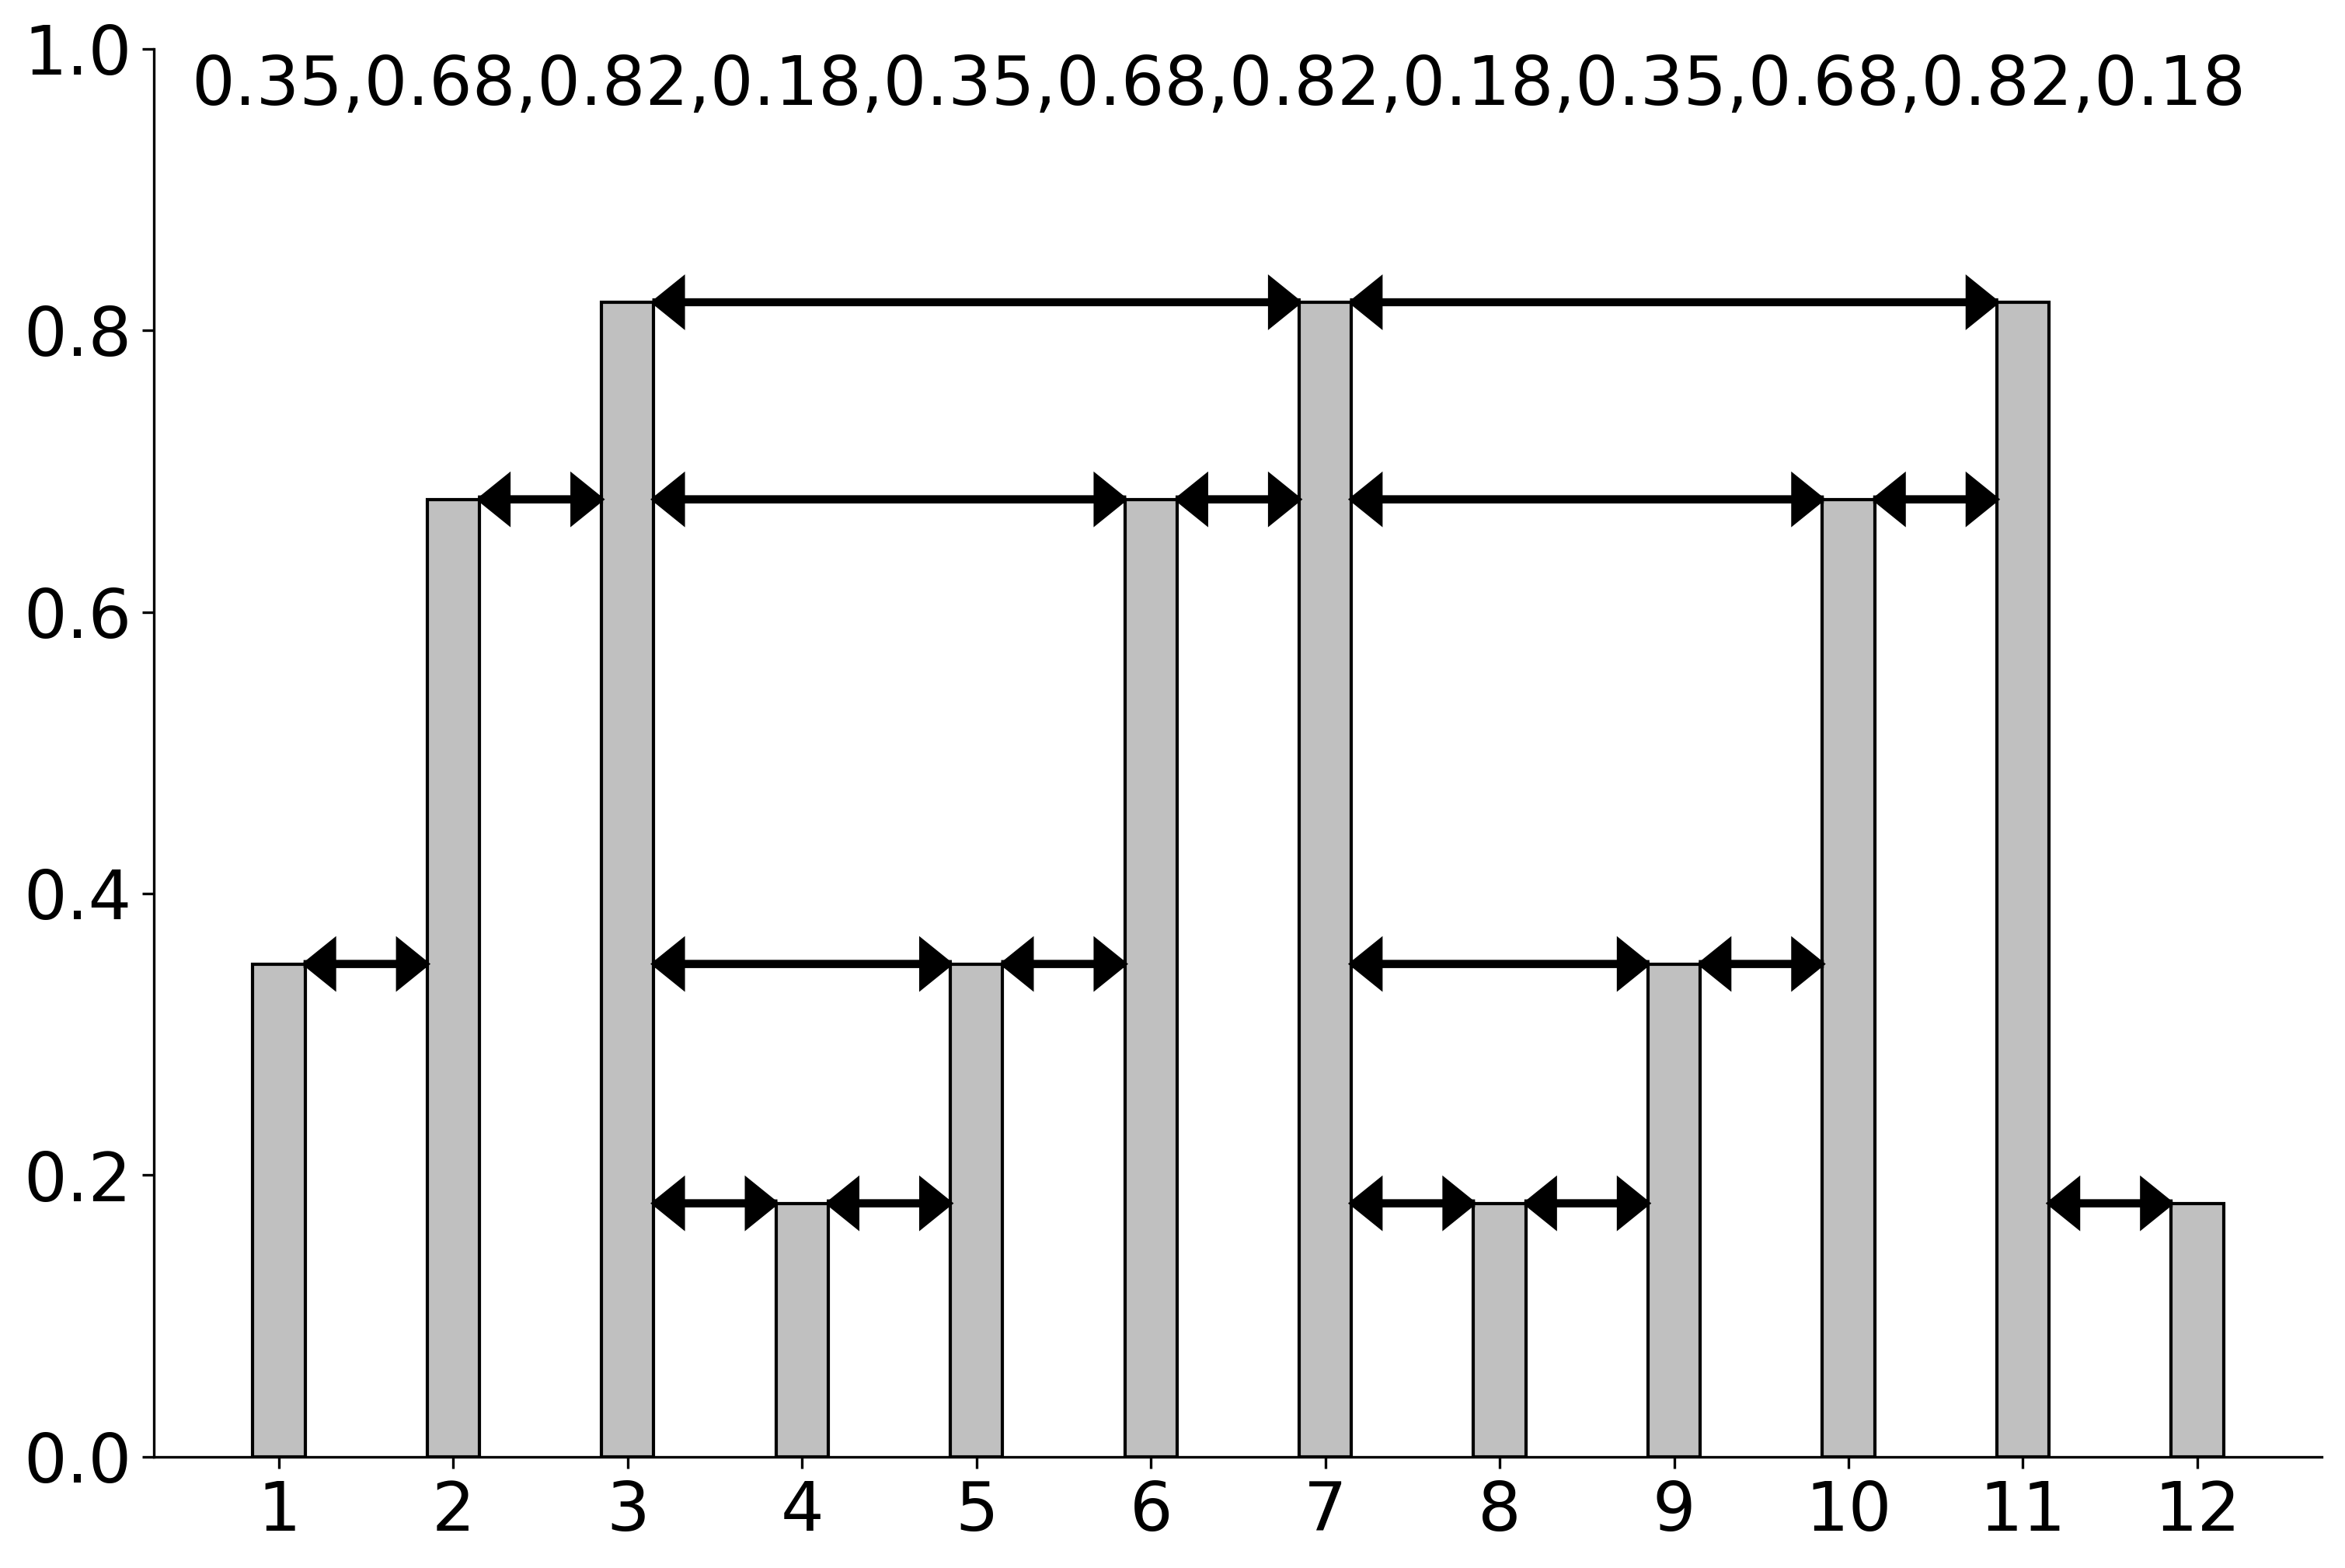

In [5]:
#HVG_bar函数：输入序列Q，输出VG条形图（需先调用getVGPoint函数）
def HVG_bar(Q):
    #准备画布，和一个坐标轴
    fig = plt.figure(figsize=(12, 8), dpi=300)#设置图形大小
    ax = fig.add_subplot(111)
    
    #设置样式
    #ax.set_yticks([])#不显示y坐标轴标签
    plt.ylim(0,1)
    plt.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)#不显示上边框
    ax.spines['right'].set_visible(False)#不显示右边框
    
    #画条形图
    x= np.array(range(0,len(Q)))
    p1=ax.bar(x,Q,width=0.3,color='#C0C0C0',edgecolor='black',zorder=10)

    #获取要连接两点的坐标
    arr=getHVGPoint2(Q)

    #在图中连接两点
    for i in range(0,len(arr[0])):
        p2=ax.arrow(arr[0][i]+0.16, min([Q[arr[0][i]],Q[arr[1][i]]]),arr[1][i]-0.16-(arr[0][i]+0.16),0,color='black',length_includes_head=True,head_width=0.03,head_length=0.15,linewidth=2,zorder=11)
        p2=ax.arrow(arr[1][i]-0.16, min([Q[arr[1][i]],Q[arr[0][i]]]),-arr[1][i]+0.16+(arr[0][i]+0.16),0,color='black',length_includes_head=True,head_width=0.03,head_length=0.15,linewidth=2,zorder=11)
        
    #设置x轴刻度的值（为直方条高度），调整字体大小
    plt.xticks(x,range(1, len(Q) + 1),fontsize=21)
    plt.yticks(fontsize=21)
    
    
    plt.text(-0.5,0.96, "0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18", size=21,
         bbox=dict(boxstyle="square",
                  color="#FFFFFF"
                   )
         )
    
    plt.rcParams['xtick.direction'] = 'in' #将x轴的刻度线方向设置向内
    plt.rcParams['ytick.direction'] = 'in' #将y轴的刻度方向设置向内
    
    #保存图片
    #plt.savefig('E:\\HVG_bar.png',bbox_inches="tight",dpi=600)
    
    #显示图像
    plt.show()
    
#调用
HVG_bar(Q)

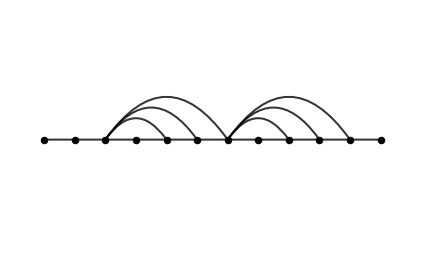

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
def HVG_net(Q):
    arr=getHVGPoint(Q)
    x=np.array(range(0,len(Q)))
    G = nx.Graph()        # 无多重边无向图

    #点
    G.add_nodes_from(x)  # 添加多个节点

    #边
    for i in range(0,len(arr[0])):
        if arr[1][i]-arr[0][i]==1:
            G.add_edges_from([(arr[0][i],arr[1][i])],rad=0)
        else:
            G.add_edges_from([(arr[0][i],arr[1][i])],rad=0.7)

    #位置
    pos=dict()
    for i in range(len(Q),-1,-1):
        sd={i:(i,0)}
        pos={**sd,**pos}
    #print(edge)

    ax = plt.gca()###重要，必需存在

    #画点
    nx.draw_networkx_nodes(G, pos, node_size=42, nodelist=x, node_color="black")


    for edge in G.edges(data=True):
        if edge[1]-edge[0]==1:
                rad=0
        else:
                rad=0.7
        arrowprops=dict(arrowstyle="-",
                        color='black',
                        connectionstyle=f"arc3,rad={rad}",
                        linestyle= '-',
                        linewidth=2,
                        alpha=0.8,)
        ax.annotate("", xy=[edge[0],0], xytext=[edge[1],0],arrowprops=arrowprops)
    ax.margins(0.11)
    plt.tight_layout()
    plt.axis("off")
    #plt.savefig('E:\\HVG_net.png',dpi=600)
    plt.show()

HVG_net(Q)